In [1]:
import proplot as pplt
import numpy as np
from ruamel.yaml import YAML
import xarray as xr

from pathlib import Path
import nwp_ensemble as ens
import user_context as context

/home/valentina/dev/scm_rundir/nwp_ensemble.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start_dates = pd.date_range(


In [2]:
plotting_dir = context.plotting_dir / "ensemble"
plotting_dir.mkdir(exist_ok=True)
ensemble_directory = Path("ensemble_output")

In [3]:
schwarz_directories = []
yaml = YAML(typ="unsafe", pure=True)
for date_dir in ensemble_directory.glob("*"):
    for init_dir in date_dir.glob("*"):
        schwarz_directories.append(init_dir / "schwarz")
schwarz_dicts = []
for schwarz_dir in schwarz_directories:
    with open(schwarz_dir / "setup_dict.yaml") as yaml_file:
        schwarz_dicts.append(yaml.load(yaml_file))

iterations = np.array([schwarz_dict["iteration"] for schwarz_dict in schwarz_dicts])
# start_dates = np.array([schwarz_dict["run_start_date"] for schwarz_dict in schwarz_dicts])
iterations = xr.DataArray(iterations, name="iterations")

In [4]:
iteration_count = iterations.groupby(iterations).count()
iteration_count.name = "Iteration Count"
iteration_count = iteration_count.drop_sel(iterations=39)

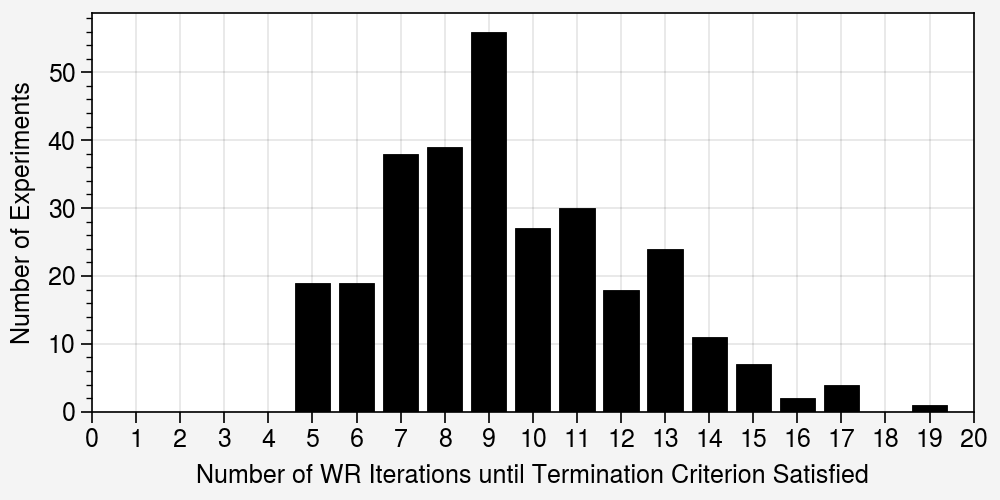

In [5]:
fig, ax = pplt.subplots(width="40em", height="20em")
ax.bar(iteration_count, absolute_width=True, color="k")
ax.format(
    xlabel="Number of WR Iterations until Termination Criterion Satisfied",
    ylabel="Number of Experiments",
    xlim=[0, 20],
    xticks=np.arange(0, 21),
    xtickminor=False,
)
fig.savefig(plotting_dir / "swr_iteration_count.pdf")